<a href="https://colab.research.google.com/github/lena110200/Class2022-spring/blob/master/nlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Tokenization
- string을 하나하나 단어수준에서 끊어서 들고있는것. 
-list안에 단어를 담고 있는것처럼 

In [ ]:
import nltk #natural language 사람의 언어.text <-> artificial language 컴퓨터어 

In [ ]:
# copy a file from github
import os
url = "https://raw.githubusercontent.com/hsnam95/class2022Spring/main/crime_punishment.txt"#깃텁에 있는
os.system("curl " + url + " > crime_punishment.txt") #-> 여기 실행하면 서버 current folder에 옴 

# read a text file in the server
file = open("crime_punishment.txt")
text = file.read().replace("\n", " ") #text에 모든 txt가 들어와있음 .
#text라는 변수에 ~.txt에 들어있는 파일을 string으로 가져옴  
file.close()

In [ ]:
# or copy/pase text here/ 위에 처럼 하던지 이거처럼 하던지 
text = 'Here’s to the crazy ones, the misfits, the rebels, the troublemakers, the round pegs in the square holes. \
The ones who see things differently — they’re not fond of rules. \
You can quote them, disagree with them, glorify or vilify them, \
but the only thing you can’t do is ignore them because they change things. \
They push the human race forward, and while some may see them as the crazy ones, we see genius, \
because the ones who are crazy enough to think that they can change the world, are the ones who do.'

In [ ]:
# write out a text file
file = open("tmp.txt", "w") #파일자체를 write out. / 위의 내용이 담김 text file이 만들어짐 
file.write(text)#text에 str으로 들어있다면 file울 output으로 만들수있음 
file.close()

In [ ]:
text.split() # 띄워쓰기를 기준으로 쪼개짐 / list로 / tockenize한것 

In [ ]:
' '.join(text.split()) #split한걸 다시 join / space를 가지고 list에 있는 tocken들을 결합 . one text로 만들어줌 

'Here’s to the crazy ones, the misfits, the rebels, the troublemakers, the round pegs in the square holes. The ones who see things differently — they’re not fond of rules. You can quote them, disagree with them, glorify or vilify them, but the only thing you can’t do is ignore them because they change things. They push the human race forward, and while some may see them as the crazy ones, we see genius, because the ones who are crazy enough to think that they can change the world, are the ones who do.'

In [ ]:
from nltk.tokenize import word_tokenize
nltk.download('punkt') #punc이 뭔가에 대한 정의 
words = word_tokenize(text)  #punctuation 쪼개기 / punctuation 이 따로 token으로 잡힘 
#단점 : punc은 필요하지 않는데 잡는다 해서 도움되지 않음 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
from nltk.tokenize import RegexpTokenizer #punc없애기 
retokenize = RegexpTokenizer("[\w]+") #regular expression기반 
words = retokenize.tokenize(text) #punc빠져있음 retokenize / 진짜 쓸 tokenizer 

### Normalization  
**Stemming** 어간 추출/ 대충의 패턴 규칙으로 어미를 잘라내는 것 (사전에 없는 어간 나올 수 있음)
- 어간추출. 대충 패턴 규칙으로 이부분이 어미일거다 해서 잘라내는것. 

**Lemmatization** 표제어(기본 사전형) 추출.


In [ ]:
#normalization - 깨끗하게 하는것. 동사, 명사 활용이 되어 있는 것을 분리해내는. 

In [ ]:
from nltk.stem import PorterStemmer 
stemmer = PorterStemmer()
[stemmer.stem(w) for w in words] #words에는 위에서 retockenize해서 자른것. /하나씩 w에 담아서 stemmer씀
# 사전에 없는 crazi, troublemak 등.. , glorifi 기계적으로 대충 끊다 보니 -단점

In [ ]:
from nltk.stem import LancasterStemmer
stemmer = LancasterStemmer()
[stemmer.stem(w) for w in words]

In [ ]:
from nltk.stem import WordNetLemmatizer # 표제어를 기반으로 원형으로 복구 /훨씬 정교한 tockenizer
nltk.download('wordnet') #존재하는 word기반 
lemmatizer = WordNetLemmatizer()
[lemmatizer.lemmatize(w) for w in words]

### Stopword
-단어들 중 너무 많이 쓰는 단어 (대명사 조동사 관사) 는 관심이 없어서 따로 모아놓기도. : 불용어 

In [ ]:
from nltk.corpus import stopwords  #nltk에서 제공하는 stopword
nltk.download('stopwords') 
print(words) # regular expression기반으로 아까 잘랐던것 [14]에서
words = [w for w in words if not w in stopwords.words('english')] # words에 단어들을 하나씩 for loop로 검사. 
#하나하나의 단어가 stopwords에 들어있지 않으면 취하라 -stopword에 들어있는거 빼라 
#s, to, the 등 빠짐 
print(words) 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
['Here', 's', 'to', 'the', 'crazy', 'ones', 'the', 'misfits', 'the', 'rebels', 'the', 'troublemakers', 'the', 'round', 'pegs', 'in', 'the', 'square', 'holes', 'The', 'ones', 'who', 'see', 'things', 'differently', 'they', 're', 'not', 'fond', 'of', 'rules', 'You', 'can', 'quote', 'them', 'disagree', 'with', 'them', 'glorify', 'or', 'vilify', 'them', 'but', 'the', 'only', 'thing', 'you', 'can', 't', 'do', 'is', 'ignore', 'them', 'because', 'they', 'change', 'things', 'They', 'push', 'the', 'human', 'race', 'forward', 'and', 'while', 'some', 'may', 'see', 'them', 'as', 'the', 'crazy', 'ones', 'we', 'see', 'genius', 'because', 'the', 'ones', 'who', 'are', 'crazy', 'enough', 'to', 'think', 'that', 'they', 'can', 'change', 'the', 'world', 'are', 'the', 'ones', 'who', 'do']
['Here', 'crazy', 'ones', 'misfits', 'rebels', 'troublemakers', 'round', 'pegs', 'square', 'holes', 'The', 'one

### Collocation, Concordance
-collocation : 연어.(숙어) ( take care, michael and smith) 
-concordance : 특정단어에 대해 용래가 어떻게 되는지. would가 어떻게 큰 concorce에서 사용되는지 

In [ ]:
nltk.download('gutenberg') # nltk안에 담겨있는 소설 다운 
#gutenberg project- 저작권이 지난 text 모아서 무료로 제공하는 
text = nltk.corpus.gutenberg.raw('austen-emma.txt') # emma라는 소설을 통째로. 
#text에는 str으로 다 들어있음. (text 타입은 str)
words = retokenize.tokenize(text)  #words 의 type은 list 

In [ ]:
nltk.Text(words).collocations()  # default: (num=20, window_size=2) - window size -단어가 몇개로 연속
# 총 20개의 collocation - 2개가 연속해서 나오는 단어들 , 주로 사람이름 . 연어. 

Mrs Weston; Frank Churchill; Miss Woodhouse; Mrs Elton; Miss Bates;
Jane Fairfax; Miss Fairfax; every thing; young man; every body; great
deal; Mrs Goddard; dare say; Maple Grove; John Knightley; Miss Taylor;
Miss Smith; Robert Martin; Colonel Campbell; Box Hill


In [ ]:
nltk.Text(words).concordance('Emma', 79, 10) #용래 
# emma라는 단어가 등장하는 context를 같이 보여주는 10개를 뽑아라 
#79는 character숫자 

In [ ]:
nltk.Text(words).dispersion_plot(["Emma", "Knightley", "Frank", "Jane", "Harriet", "Robert"])
#x축은 concorce전체 
#16만개(words라는 list에 들어있는 단어의 개수)의 순서에서 emma가 어디에 등장하는지 표시 
#누가 주인공인지 조연인지 알수잇음 
#다양한 단어들이 어떻게 분포되어있는지 

In [ ]:
# Distributional similarity: 
# find other words which appear in the same contexts as the specified word; 
# list most similar words first.
nltk.Text(words).similar("Emma") # 분포상으로 유사한게 무엇인가 . emma와 비슷하게 양쪽옆으로 나올 단어 

she it he i harriet you her jane him that me and all they them herself
there but be isabella


In [ ]:
# Find contexts where the specified words appear; list most frequent common contexts first.
nltk.Text(words).common_contexts(["Emma", "she"]) # 두 specified word가 나타나는 context. 
#공통으로 나타나는 양쪽 단어들을 말하라 
# but, was사이에 emma와 she가 함께 나타날 가능성. 

but_was and_could that_should said_and which_could whom_knew
which_particularly and_imagined that_could said_i that_began
and_thought do_was but_could than_had said_but manner_was this_could
as_saw possible_could


### Frequency distribution, Frequency plot
-어떤 단어가 많이 쓰였는지 (어떤 document에 대한 특징을 잘 반영) 
-pitcher가 많이 나오면 야구에서. 


In [ ]:
fd = nltk.FreqDist(words).most_common(20) #어떤 단어들이 가장 자주 나오는가 
fd

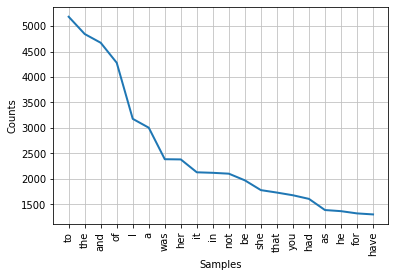

In [ ]:
nltk.Text(words).plot(20) 

### Dictionary
-사전을 통으로 불러서 유용하게 쓸수도 

In [ ]:
nltk.download('words') 
nltk.corpus.words.words('en')[-20:-1] # 영어 사전 / 젤 마지막 20개 - z로 시작되는것들 


In [ ]:
len(nltk.corpus.words.words('en')) #사전이 포함하고 있는 단어의 개수 

235886

### Extract information (pos tag, named entity)
-품사들의 정의와 설명 , 예 


In [ ]:
#given sentence, given paragraph에 대해서 pos tag를 줌 
#pos tag : part of speech 품사.(접속사 관사 형용사 소유격 동사 등 ) / 

#### **POS tag list**:

CC	coordinating conjunction \
CD	cardinal digit \
DT	determiner \
EX	existential there (like: "there is" ... think of it like "there exists") \
FW	foreign word \
IN	preposition/subordinating conjunction \
JJ	adjective	'big' \
JJR	adjective, comparative	'bigger' \
JJS	adjective, superlative	'biggest' \
LS	list marker	1) \
MD	modal	could, will \
NN	noun, singular 'desk' \
NNS	noun plural	'desks' \
NNP	proper noun, singular	'Harrison' \
NNPS	proper noun, plural	'Americans' \
PDT	predeterminer	'all the kids' \
POS	possessive ending	parent's \
PRP	personal pronoun	I, he, she \
PRP\$	possessive pronoun	my, his, hers \
RB	adverb	very, silently, \
RBR	adverb, comparative	better \
RBS	adverb, superlative	best \
RP	particle	give up \
TO	to	go 'to' the store. \
UH	interjection	errrrrrrrm \
VB	verb, base form	take \
VBD	verb, past tense	took \
VBG	verb, gerund/present participle	taking \
VBN	verb, past participle	taken \
VBP	verb, sing. present, non-3d	take \
VBZ	verb, 3rd person sing. present	takes \
WDT	wh-determiner	which \
WP	wh-pronoun	who, what \
WP\$	possessive wh-pronoun	whose \
WRB	wh-abverb	where, when \

In [ ]:
sent = "I am Jhon from America and would like to go to Starbuck"
words = nltk.word_tokenize(sent) # tockenize먼저 하고 pos에 대해 품사를 적어.

In [ ]:
nltk.download('averaged_perceptron_tagger')
pos = nltk.pos_tag(words) 

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
pos #대명사 be동사 지명 to부정사 등.. 

[('I', 'PRP'),
 ('am', 'VBP'),
 ('Jhon', 'RB'),
 ('from', 'IN'),
 ('America', 'NNP'),
 ('and', 'CC'),
 ('would', 'MD'),
 ('like', 'VB'),
 ('to', 'TO'),
 ('go', 'VB'),
 ('to', 'TO'),
 ('Starbuck', 'NNP')]

In [ ]:
nltk.download('maxent_ne_chunker')
NE = nltk.ne_chunk(pos) # named entity - 조직 사람 위치 날 시간 등에 대한 정보 
# common Entity types: ORGANIZATION, PERSON, LOCATION, DATE, TIME, MONEY, and GPE (geo-political entity)

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!


In [ ]:
NE 

### Wordcloud
- 어떤 text에 어떤 단어가 많이 나왔는지 
- 단어의 빈도별로 글자의 크기를 달리해서 visualize 

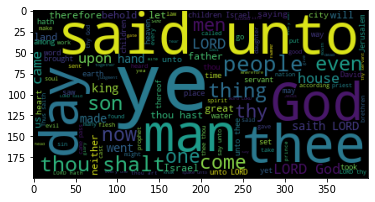

In [ ]:
from wordcloud import WordCloud, STOPWORDS #wordcloud- fre를 기반. fontsize와 관련돼있음 
import matplotlib.pyplot as plt

text = nltk.corpus.gutenberg.raw('bible-kjv.txt') # bible(str)을 가지고 와서 text에 담겨 
#text에는 str으로 
wc = WordCloud().generate(text) 
plt.imshow(wc) # 성경 전체에서 많이나오는 단어들 위주로 fontsize가 정해짐

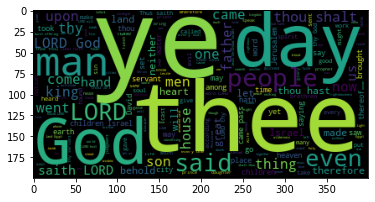

In [ ]:
stopwords = set(STOPWORDS) 
stopwords.add('unto') # stopword에 unto 추가 
wc = WordCloud(stopwords = stopwords).generate(text) #기존에 있던 stpword에 unto를 더함 
plt.imshow(wc) #unto 빠짐 

### Regular expression
-규칙을 표현하는것 
-어떤 text에 조작을 가하고싶을때 혹은 search를 하고싶을때 규칙으로 찾아냄 . 
-워드에서 search를 할때 여러가지 표시를 해서 search option을 다양하게 할수있는데 
- 규칙을 쓰는법 

In [ ]:
import re

In [ ]:
re.search('a', 'abcdefa') #주어진 string에 대해 뭔갈 찾는거 두번째 str에 대해 a를 찾아라
#젤 첨 발견되는 a 찾아  

<re.Match object; span=(0, 1), match='a'>

In [ ]:
re.findall('a', 'abcdefa') # a전부 찾아서 list로 만들어주는. str전체에서 해당되는걸 다 찾아주는 

['a', 'a']

In [ ]:
re.sub('a', 'b', 'abcdefa') #replace/ a를 b로 바꾸어라 /전부다 해당 

'bbcdefb'

In [ ]:
'''       Basic Regular Expression Meta-Characters, Including Wildcards, Ranges and Closures

.	        Wildcard, matches any character
^abc	    Matches some pattern abc at the start of a string
abc$	    Matches some pattern abc at the end of a string
[abc]	    Matches one of a set of characters
[^abc]    Matches anything but a set of characters
[A-Z0-9]	Matches one of a range of characters
ed|ing|s	Matches one of the specified strings (disjunction)
*	        Zero or more of previous item, e.g. a*, [a-z]* (also known as Kleene Closure)
+	        One or more of previous item, e.g. a+, [a-z]+
?	        Zero or one of the previous item (i.e. optional), e.g. a?, [a-z]?
{n}	      Exactly n repeats where n is a non-negative integer
{n,}	    At least n repeats
{,n}	    No more than n repeats
{m,n}	    At least m and no more than n repeats
a(b|c)+	  Parentheses that indicate the scope of the operators
(...)     Matches whatever regular expression is inside the parentheses
\d
Matches any decimal digit; this is equivalent to the class [0-9].
\D
Matches any non-digit character; this is equivalent to the class [^0-9].
\s
Matches any whitespace character; this is equivalent to the class [ \t\n\r\f\v].
\S
Matches any non-whitespace character; this is equivalent to the class [^ \t\n\r\f\v].
\w
Matches any alphanumeric character; this is equivalent to the class [a-zA-Z0-9_].
\W
Matches any non-alphanumeric character; this is equivalent to the class [^a-zA-Z0-9_].

'''

'       Basic Regular Expression Meta-Characters, Including Wildcards, Ranges and Closures\n\n.\t        Wildcard, matches any character\n^abc\t    Matches some pattern abc at the start of a string\nabc$\t    Matches some pattern abc at the end of a string\n[abc]\t    Matches one of a set of characters\n[^abc]    Matches anything but a set of characters\n[A-Z0-9]\tMatches one of a range of characters\ned|ing|s\tMatches one of the specified strings (disjunction)\n*\t        Zero or more of previous item, e.g. a*, [a-z]* (also known as Kleene Closure)\n+\t        One or more of previous item, e.g. a+, [a-z]+\n?\t        Zero or one of the previous item (i.e. optional), e.g. a?, [a-z]?\n{n}\t      Exactly n repeats where n is a non-negative integer\n{n,}\t    At least n repeats\n{,n}\t    No more than n repeats\n{m,n}\t    At least m and no more than n repeats\na(b|c)+\t  Parentheses that indicate the scope of the operators\n(...)     Matches whatever regular expression is inside the pare

In [ ]:
nltk.download('words') # 사전불러오기 
engdict = nltk.corpus.words.words('en') #engdict의 type은 list. 
#cf) 'str'을 대상으로 regular expression인 search, findall을 쓰는것 !!
result = [w for w in engdict if re.search('ed$', w)]
#engdict에 있는 각각의 item을 w로 받아서 하나하나씩 for loop를 돈다 
#if 에서 w부분에 ed$가 있으면 w에 담기고 없으면 그냥 지나침. 
#abc$ : str끝에서 abc라는 부분이 있는가.오른쪽 끝에서 abc가 보이면 찾아라 / str시작에서 할때는 ^ 
#re.search : w에서 ed$라는 규칙이 만족되면 ed를 뱉어주는 -> ed를 가져오면 그냥 if 통과.w에 받아지는것.
# / list에 쌓이는건 사전 전체에서 ed로 끝나는 단어들이 result에 받아짐
result = [w for w in engdict if re.search('^..j..t..$', w)] 
#...은 어떤 char가 와도 상관없음. (j, spelling, spelling, t) 
#'^jt$'-이렇게 쓰면 str의 시작에서 jt가 나오고 str이 끝나는것. 
#(char두개, j, char 두개, t, char 2개) 
result = [w for w in engdict if re.search('^[ghi][mno][jlk][def]$', w)]
# 대괄호 :대괄호 속에 들어있는 abc중의 하나를 만족시키는 . 총 4개의 char (첫번째 char는 ghi중 하나,..)
result = [w for w in engdict if re.search('^[ah]+$', w)][:10]
#a혹은 h의 cha가 한번이상 나오는 (+) ex) a aa ah aha h ha hah
print(result[:10])

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
['abaissed', 'abandoned', 'abased', 'abashed', 'abatised', 'abed', 'aborted', 'abridged', 'abscessed', 'absconded']


In [ ]:
nltk.download('treebank') 
wsj = nltk.corpus.treebank.words() #world street journal  
l
result = [w for w in wsj if re.search('(ed|ing)$', w)] 
# bar가 있으면 'or' . ed or ing로 끝나는 단어 ex) absorbed, according 
result = [w for w in wsj if re.search('^[0-9]+\.[0-9]+$', w)]
# 0-9: 숫자가 하나이상나오고/ W.:(진짜 점)/ 숫자가 하나이상 나오는.>> 소수점으로 되있는 숫자 
#ex) 0.05, 0.1...
result = [w for w in wsj if re.search('^[A-Z]+\$$', w)]
# W$:실제 달러 / A-Z: 어떠한 대문자가 하나이상 나오고 달러로 끝나는것. ex)C$
result = [w for w in wsj if re.search('^[0-9]{4}$', w)]
# {}:몇번나오는지 . 숫자가 4번 나오는거 ex) 1614 네자리수 
result = [w for w in wsj if re.search('^[0-9]+-[a-z]{3,5}$', w)]
# 숫자가 하나이상 나오고 소문자가 3~5개 사이인걸로 끝나는./ -는 그냥 데시  
#ex)10-day, 100-share
result = [w for w in wsj if re.search('^[a-z]{5,}-[a-z]{2,3}-[a-z]{,6}$', w)]
# 소문자 5개 이상- 소문자 2~3사이-소문자 6개 이하 ex)father-in-law, bread-and-butter
result = sorted(set(result)) #이게 없으면 그냥 신문의 순서대로 나옴 
print(result[:10])

[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Unzipping corpora/treebank.zip.
['62%-owned', 'Absorbed', 'According', 'Adopting', 'Advanced', 'Advancing', 'Alfred', 'Allied', 'Annualized', 'Anything']


In [ ]:
import os
url = "https://raw.githubusercontent.com/hsnam95/my/main/friends_season01_script.txt"
os.system("curl " + url + " > friends_season01_script.txt") #파일 불러오기 

# read a text file in the server - 변수로 불러옴 
file = open("friends_season01_script.txt")
text = file.read()
file.close()
text # type은 str . 긴 str (47만) 

In [ ]:
pattern = '(?<=: ).+(?=[\.|\?|\!])' # ?<=뒤에 '내가 찾고자하는것의 앞에 나오는것'을 적어줌
#'(?<=a).(?=b)' : 왼쪽에 a 오른쪽 b 중간에 char하나만 있는것. 그 char하나만 다오
#하나이상의 char :.+ (나의 패턴) 
#왼쪽에 :이 있고 빈칸이 있으면 char가 하나이상나오고, 오른쪽은 마침표 or 물음표 혹은 느낌표로 끝나는 
sent = re.findall(pattern, text) #규칙에 해당되는걸 전부다 찾아서 list화해서 줌 : findfall 
sent #대화문장들의 list  
text = '\n'.join(sent) #list로 만든걸 다시 줄바꿈을 가지고 붙여라 (역슬래시)

In [ ]:
# write out a text file - given str(위의 text)이 있을때 file로 write out하는 법 ->다운로드 가능
file = open("20220509.txt", "w")
file.write(text)
file.close()